In [4]:
import pandas as pd     
import matplotlib.pyplot as plt               
import numpy as np            
import seaborn as sns            
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import datetime as dt

from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'E:\Python\ML\uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [7]:
df.shape

(200000, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.fillna(df['dropoff_longitude'].mean(), inplace=True)
df.fillna(df['dropoff_latitude'].mean(), inplace=True)
df.drop('Unnamed: 0', inplace=True, axis =1)

In [12]:
df['pickup_date']= df['pickup_datetime'].str[0:10]

In [13]:
df['pickup_time']=df['pickup_datetime'].str[11:19]

In [14]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

df['pickup_year'] = df['pickup_date'].dt.year
df['pickup_month'] = df['pickup_date'].dt.month
df['pickup_day_of_week'] = df['pickup_date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['pickup_day_of_month'] = df['pickup_date'].dt.day

df['pickup_time'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S').dt.time
df['pickup_hour'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S').dt.hour
df['pickup_minute'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S').dt.minute
df['pickup_second'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S').dt.second

df.drop(['pickup_date', 'pickup_time'], axis=1, inplace=True)

In [15]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day_of_week,pickup_day_of_month,pickup_hour,pickup_minute,pickup_second
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19,52,6
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20,4,56
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21,45,0
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8,22,21
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17,47,0


In [16]:
df.drop(['key','pickup_datetime'], inplace=True, axis=1)

In [17]:
import math

def haversine(lon1, lat1, lon2, lat2):
    R = 6371.0
    
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    lat = lat2 - lat1
    lon = lon2 - lon1

    a = math.sin(lat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(lon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    distance = R * c
    return distance

df['distance'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [18]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day_of_week,pickup_day_of_month,pickup_hour,pickup_minute,pickup_second,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19,52,6,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20,4,56,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21,45,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8,22,21,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17,47,0,4.475450


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fare_amount          200000 non-null  float64
 1   pickup_longitude     200000 non-null  float64
 2   pickup_latitude      200000 non-null  float64
 3   dropoff_longitude    200000 non-null  float64
 4   dropoff_latitude     200000 non-null  float64
 5   passenger_count      200000 non-null  int64  
 6   pickup_year          200000 non-null  int32  
 7   pickup_month         200000 non-null  int32  
 8   pickup_day_of_week   200000 non-null  int32  
 9   pickup_day_of_month  200000 non-null  int32  
 10  pickup_hour          200000 non-null  int32  
 11  pickup_minute        200000 non-null  int32  
 12  pickup_second        200000 non-null  int32  
 13  distance             200000 non-null  float64
dtypes: float64(6), int32(7), int64(1)
memory usage: 16.0 MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,200000.0,11.359955,9.901776,-52.000000,6.000000,8.500000,12.500000,499.000000
pickup_longitude,200000.0,-72.527638,11.437787,-1340.648410,-73.992065,-73.981823,-73.967154,57.418457
pickup_latitude,200000.0,39.935885,7.720539,-74.015515,40.734796,40.752592,40.767158,1644.421482
dropoff_longitude,200000.0,-72.525292,13.117375,-3356.666300,-73.991407,-73.980093,-73.963658,1153.572603
dropoff_latitude,200000.0,39.923328,6.799463,-881.985513,40.733823,40.753042,40.768001,872.697628
passenger_count,200000.0,1.684535,1.385997,0.000000,1.000000,1.000000,2.000000,208.000000
pickup_year,200000.0,2011.742440,1.856397,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
pickup_month,200000.0,6.281795,3.438925,1.000000,3.000000,6.000000,9.000000,12.000000
pickup_day_of_week,200000.0,3.048425,1.946946,0.000000,1.000000,3.000000,5.000000,6.000000
pickup_day_of_month,200000.0,15.704670,8.687409,1.000000,8.000000,16.000000,23.000000,31.000000


In [21]:
num_col = df.select_dtypes(include=np.number).columns
num_col

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_day_of_week',
       'pickup_day_of_month', 'pickup_hour', 'pickup_minute', 'pickup_second',
       'distance'],
      dtype='object')

fare_amount


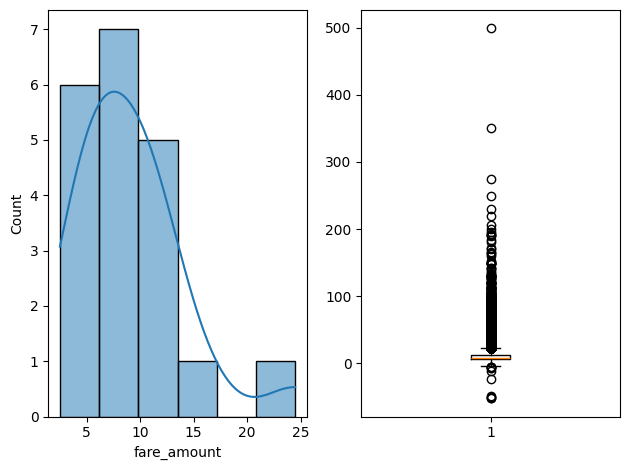

pickup_longitude


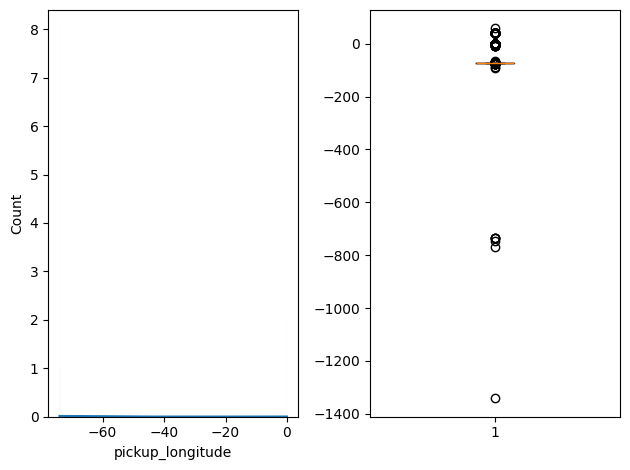

pickup_latitude


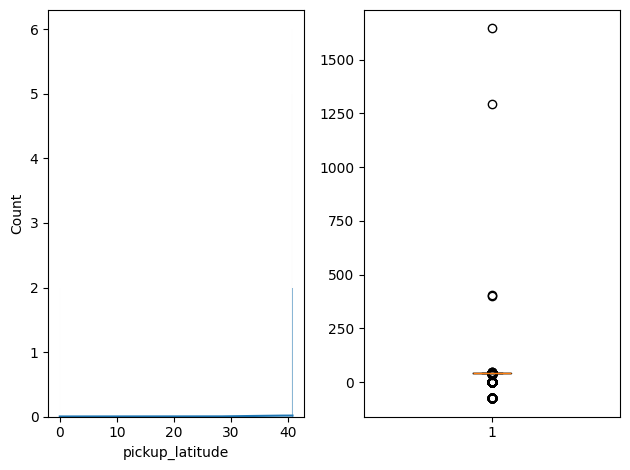

dropoff_longitude


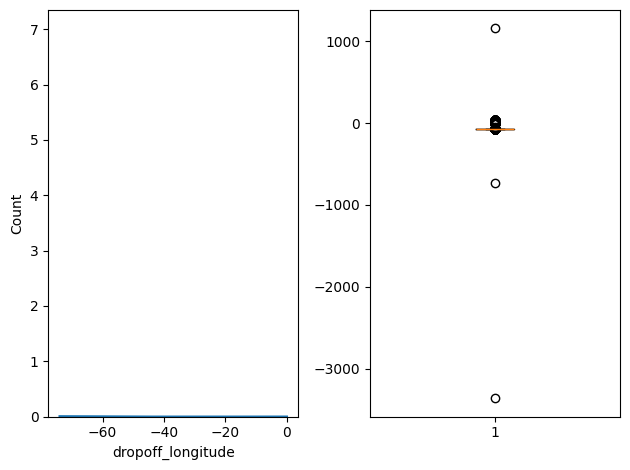

dropoff_latitude


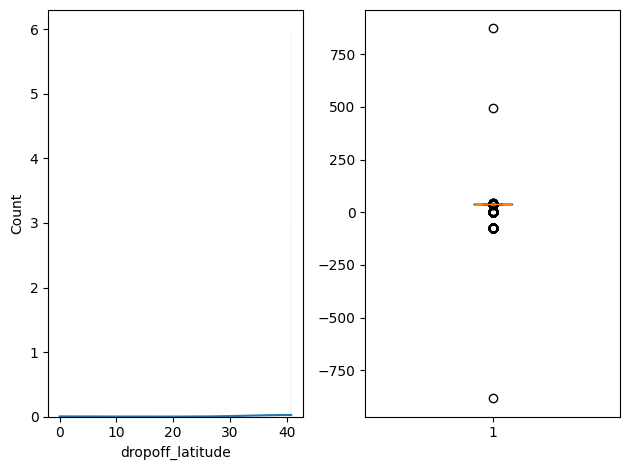

passenger_count


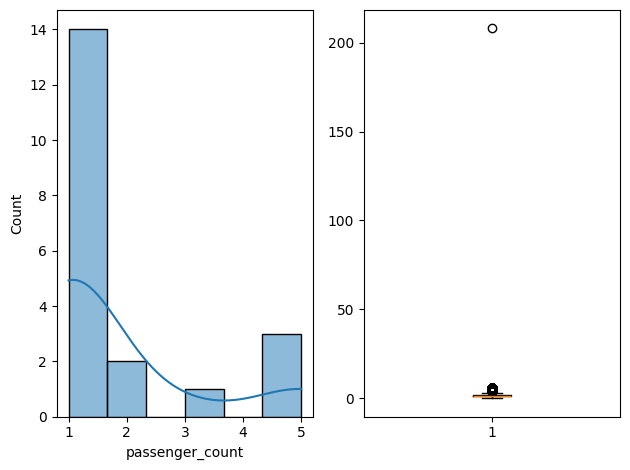

pickup_year


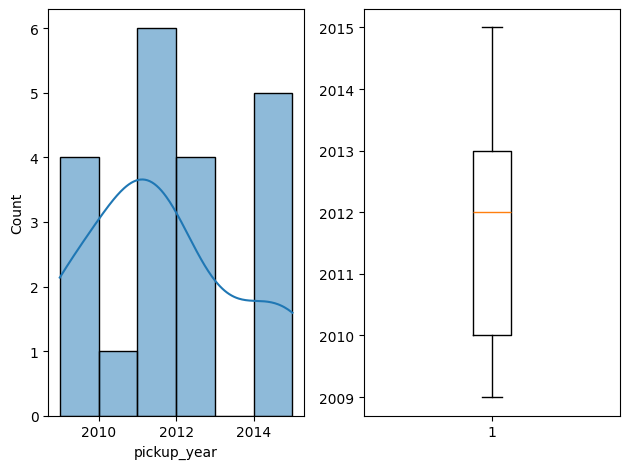

pickup_month


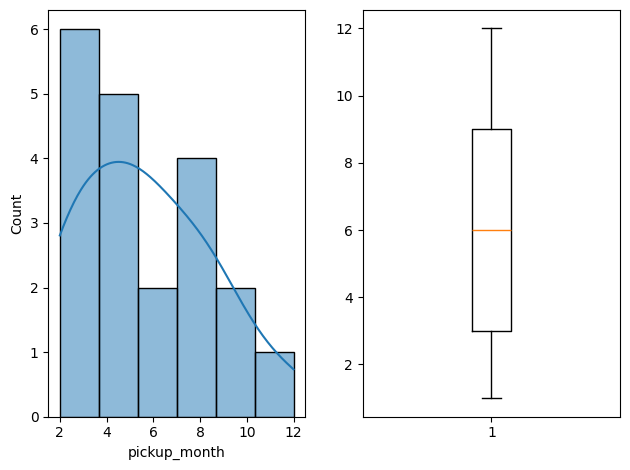

pickup_day_of_week


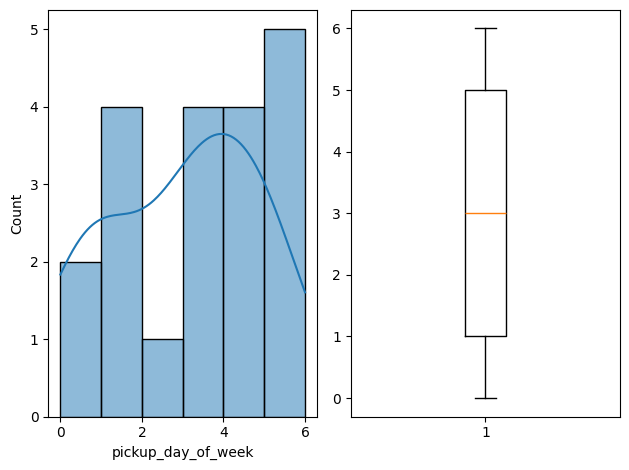

pickup_day_of_month


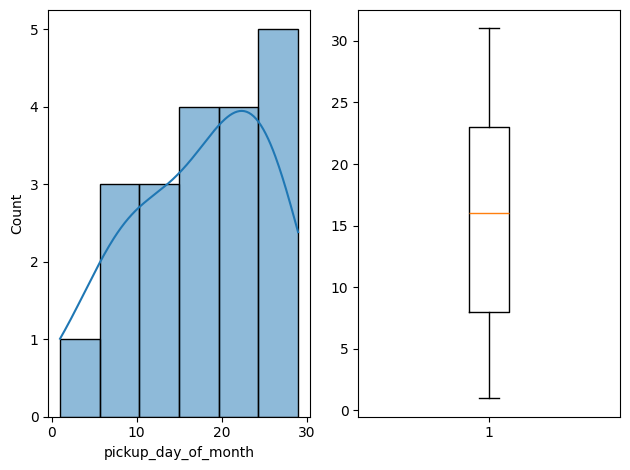

pickup_hour


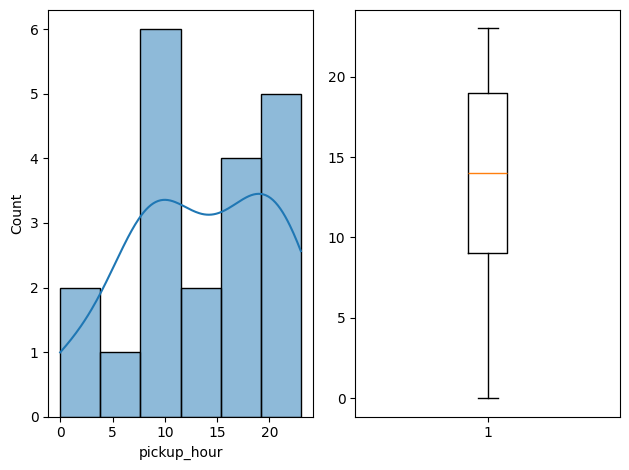

pickup_minute


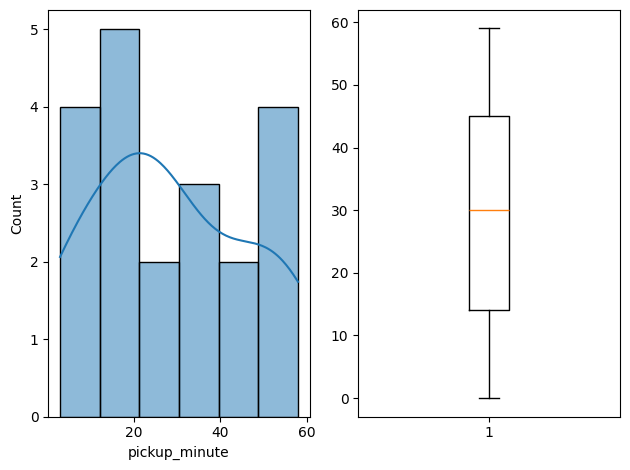

pickup_second


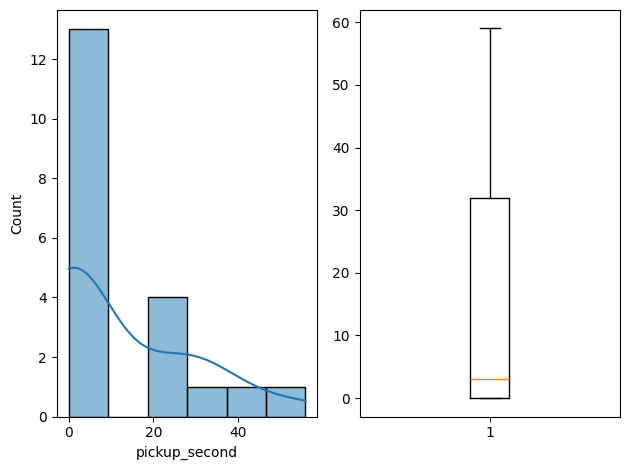

distance


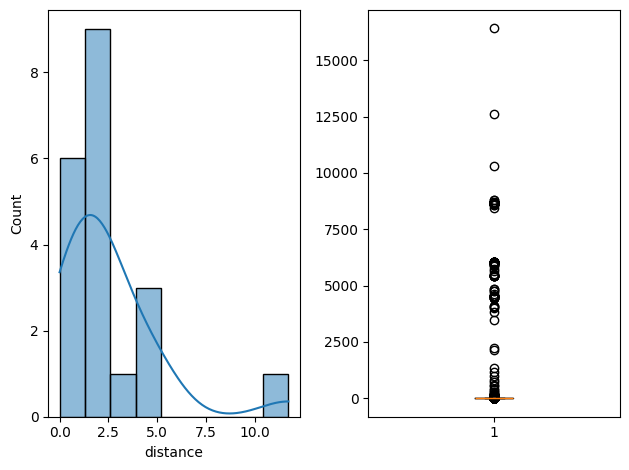

In [22]:
for col in num_col:
    print(col)
    plt.figure()

    plt.subplot(1,2,1)
    sns.histplot(df[col].head(20), kde = True)

    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [23]:
def iqr(df,x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    i = q3-q1
    lf = q1 - 1.5*i
    hf = q3 + 1.5*i
    df = df[(x >= lf) & (x <= hf)]
    return df
df = iqr(df,df['distance'])
df = iqr(df,df['fare_amount'])

In [24]:
df.shape

(176776, 14)

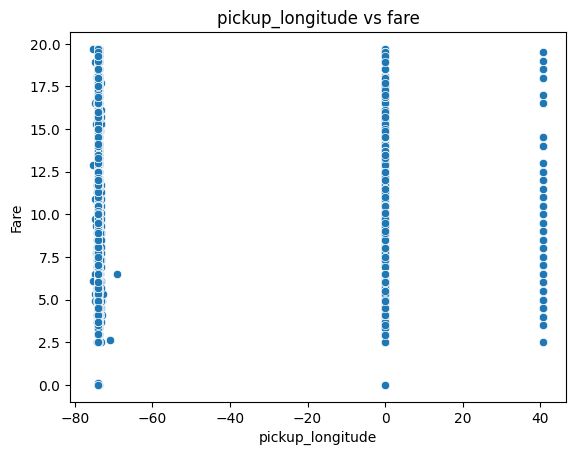

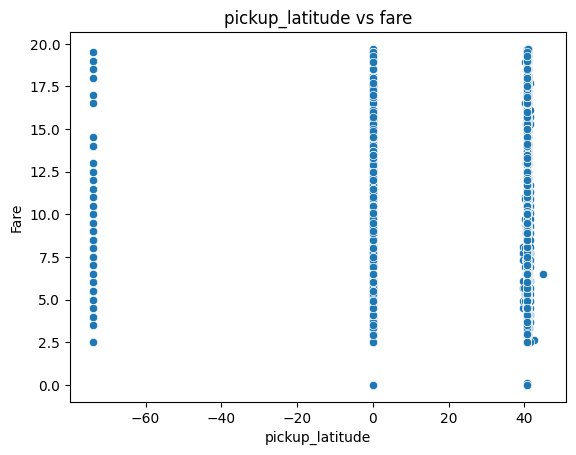

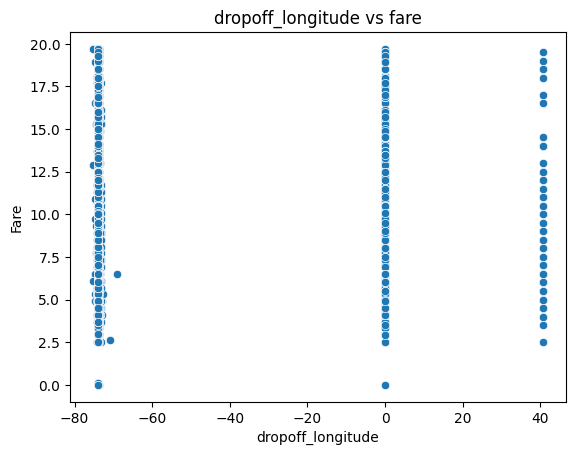

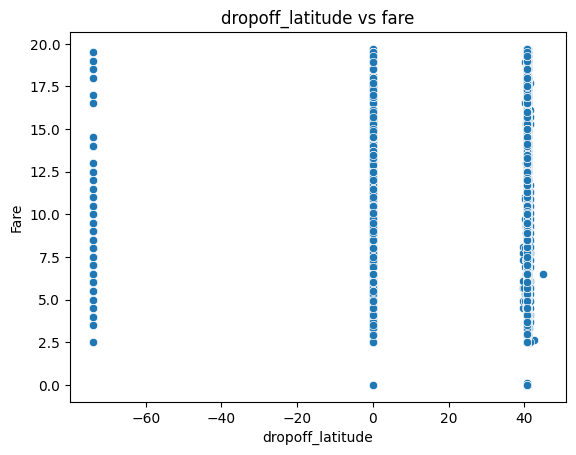

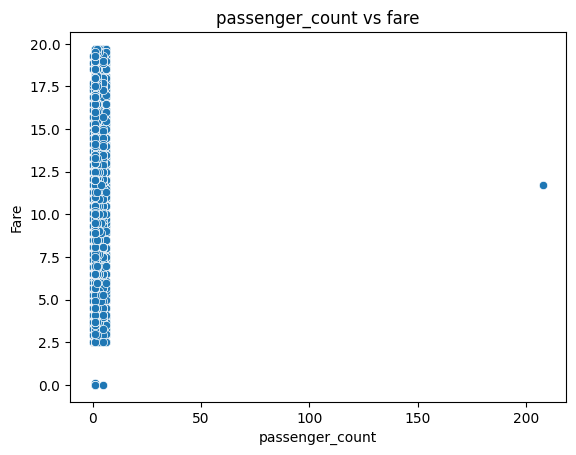

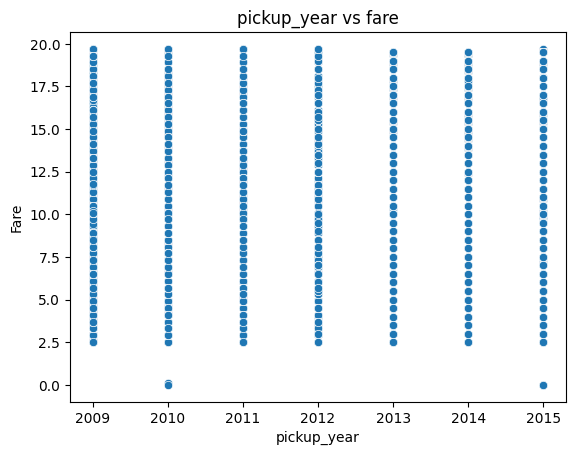

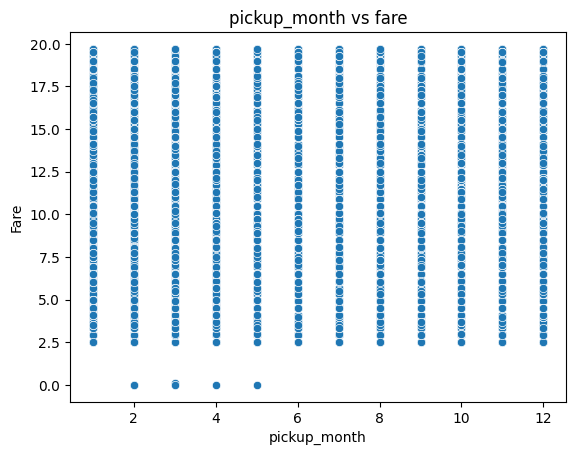

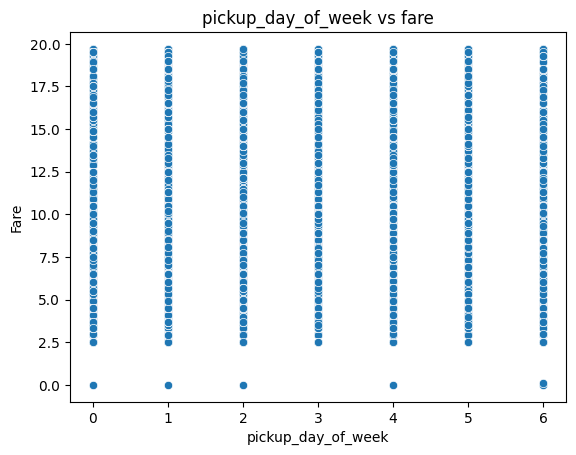

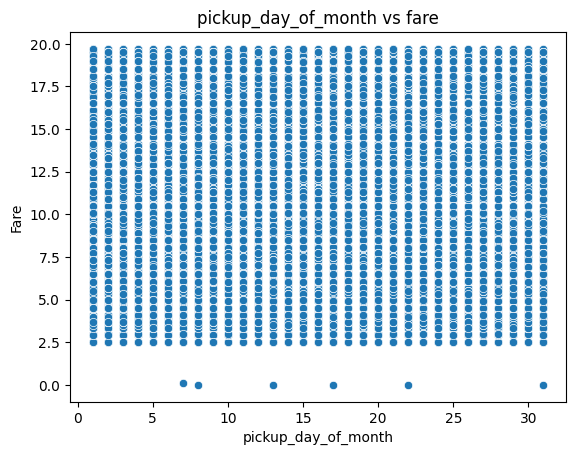

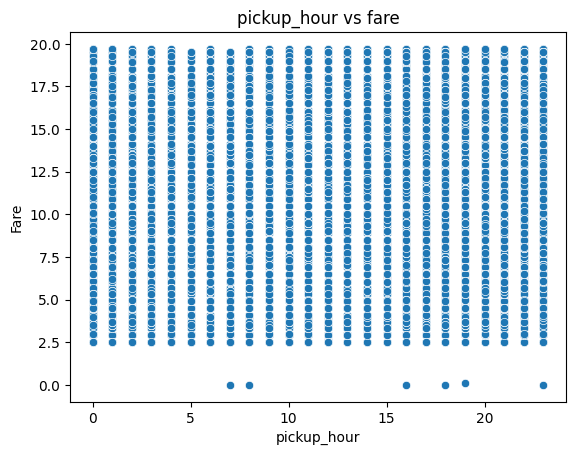

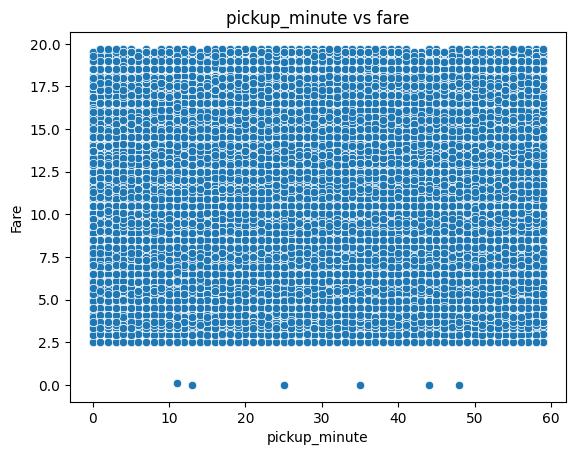

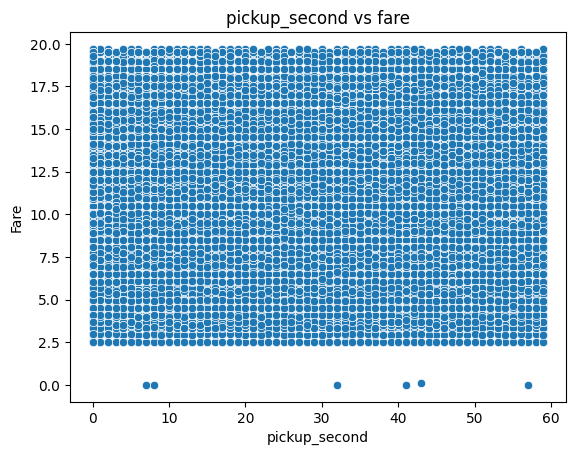

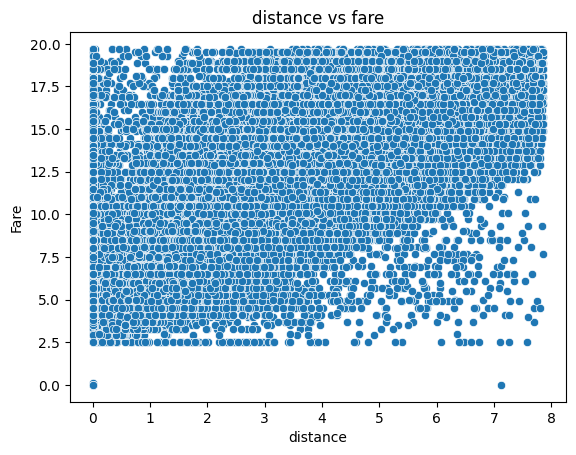

In [25]:
col = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_day_of_week',
       'pickup_day_of_month', 'pickup_hour', 'pickup_minute', 'pickup_second',
       'distance']
for i in col:
    sns.scatterplot(x=df[i], y = df['fare_amount'])
    plt.xlabel(i)
    plt.ylabel('Fare')
    plt.title(f'{i} vs fare')
    plt.show()


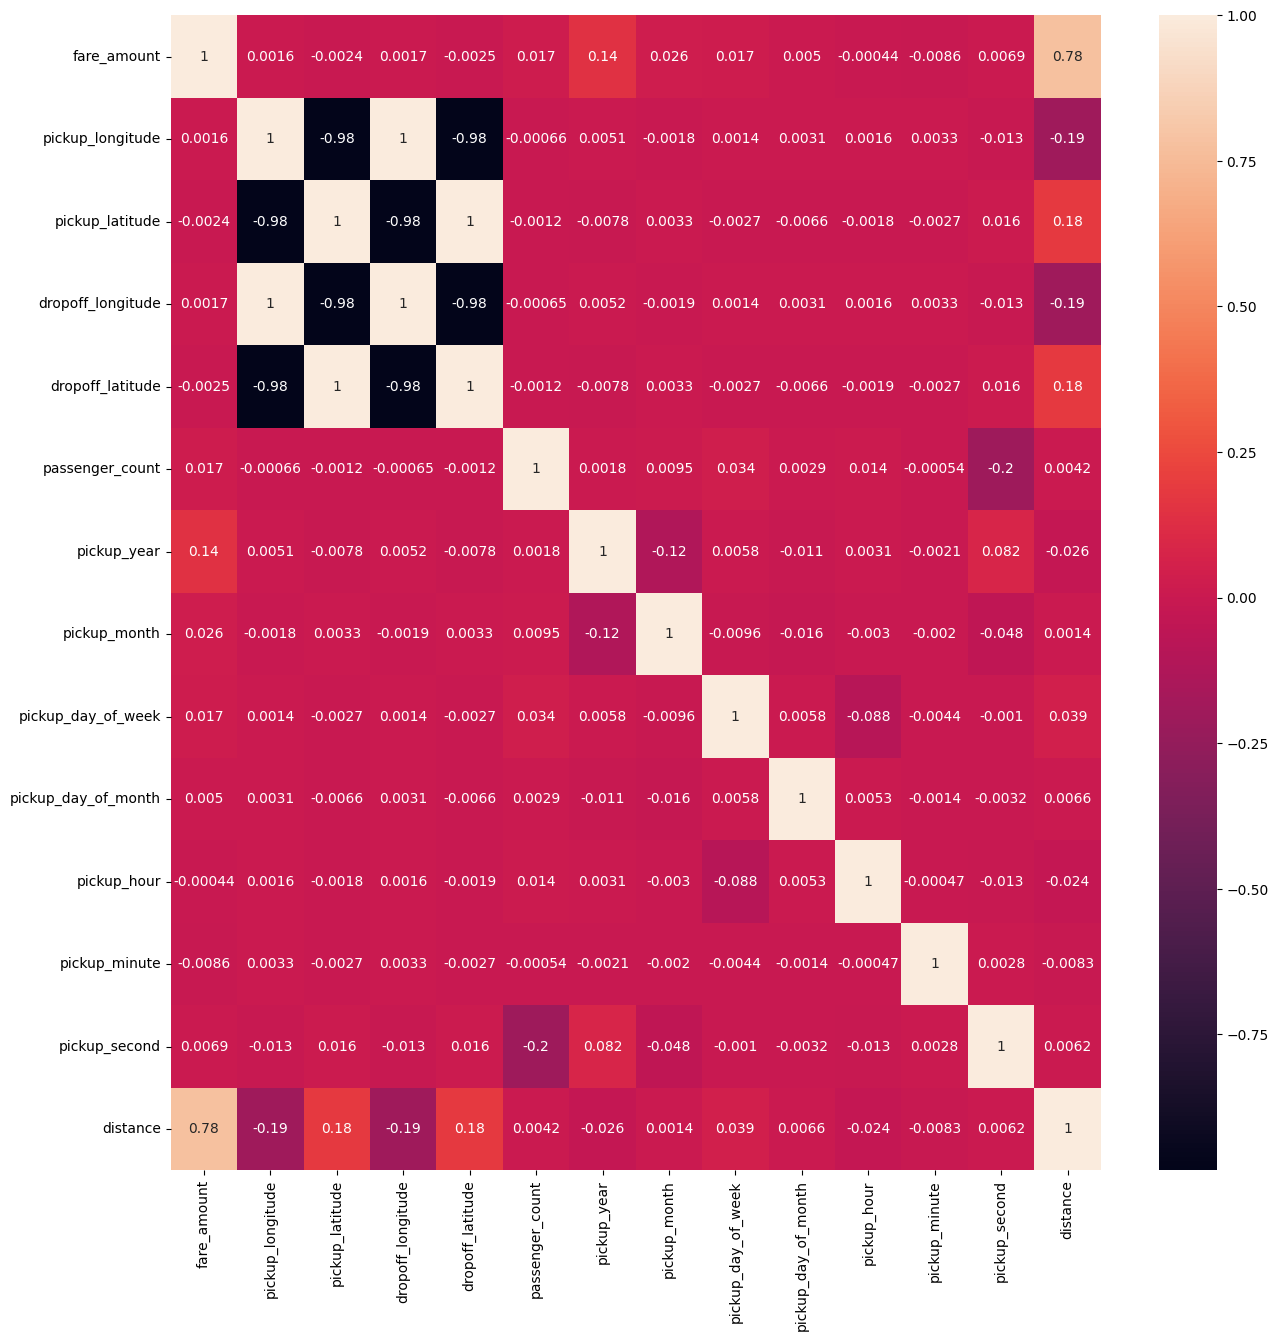

In [26]:
plt.figure(figsize=(15,15))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
X = df[['pickup_year','distance']]
# X = np.array(df['distance']).reshape(-1,1)
Y = np.array(df['fare_amount']).reshape(-1,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_scaled,Y,test_size=0.2)

In [28]:
x_scaled

array([[1.        , 0.21402307],
       [0.        , 0.31246589],
       [0.        , 0.6403412 ],
       ...,
       [0.83333333, 0.23839991],
       [1.        , 0.45005081],
       [0.16666667, 0.68883443]])

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lin = LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [30]:
train_pred = lin.predict(x_train)
test_pred = lin.predict(x_test)

In [31]:
# plt.scatter(x_test,y_test, color='b')
# plt.plot(x_test,test_pred, color='r')
# plt.show()

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_train = r2_score(y_train,train_pred)
r2_test = r2_score(y_test,test_pred)

mae_train = mean_absolute_error(y_train,train_pred)
mae_test = mean_absolute_error(y_test,test_pred)

mse_train = mean_squared_error(y_train,train_pred)
mse_test = mean_squared_error(y_test,test_pred)

rmse_train = root_mean_squared_error(y_train,train_pred)
rmse_test = root_mean_squared_error(y_test,test_pred)

In [33]:
print(f'r2 train {r2_train}')
print(f'r2 test {r2_test}')
print(f'mae train {mae_train}')
print(f'mae test {mae_train}')
print(f'mse train {mse_test}')
print(f'mse test {mse_test}')
print(f'rmse train {rmse_train}')
print(f'rmse test {rmse_test}')

r2 train 0.6363970039211155
r2 test 0.6378505471328386
mae train 1.609975140402975
mae test 1.609975140402975
mse train 5.027873335119613
mse test 5.027873335119613
rmse train 2.2321163538763984
rmse test 2.242291982574886


In [34]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day_of_week,pickup_day_of_month,pickup_hour,pickup_minute,pickup_second,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,7,19,52,6,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,17,20,4,56,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,24,21,45,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,26,8,22,21,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,28,17,47,0,4.475450


In [35]:
lin.predict([[0.        , 0.6403412 ]])

array([[12.74711118]])

In [36]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)

model = LinearRegression()
model.fit(x_poly_train,y_train)

LinearRegression()

In [37]:
# plt.scatter(x_test,y_test, color='b')
# plt.plot(x_test,model.predict(poly.fit_transform(x_test)), color='r')
# plt.show()

In [38]:
# for i in range(6,15):
#     poly = PolynomialFeatures(degree=i)
#     x_poly_train = poly.fit_transform(x_train)
#     x_poly_test = poly.fit_transform(x_test)
#     model1 = LinearRegression()
#     model1.fit(x_poly_train,y_train)
#     r2_test = r2_score(y_test,model1.predict(x_poly_test))
#     r2_train = r2_score(y_train,model1.predict(x_poly_train))
#     print(r2_train,r2_test,i)

In [39]:
y_pred_train = model.predict(x_poly_train)
y_pred_test = model.predict(x_poly_test)

In [40]:
r2_trainp = r2_score(y_train,y_pred_train)
r2_testp = r2_score(y_test,y_pred_test)

mae_trainp = mean_absolute_error(y_train,y_pred_train)
mae_testp = mean_absolute_error(y_test,y_pred_test)

mse_trainp = mean_squared_error(y_train,y_pred_train)
mse_testp = mean_squared_error(y_test,y_pred_test)

rmse_trainp = root_mean_squared_error(y_train,y_pred_train)
rmse_testp = root_mean_squared_error(y_test,y_pred_test)

print(f'r2 train poly {r2_trainp}')
print(f'r2 test poly {r2_testp}')
print(f'mae train poly {mae_trainp}')
print(f'mae test poly {mae_testp}')
print(f'mse train poly {mse_trainp}')
print(f'mse test poly {mse_testp}')
print(f'rmse train poly {rmse_trainp}')
print(f'rmse test poly {rmse_testp}')

r2 train poly 0.6820819281771439
r2 test poly 0.6855420954916194
mae train poly 1.5021078986775864
mae test poly 1.5008644801088948
mse train poly 4.356336524865648
mse test poly 4.365751488999809
rmse train poly 2.087183874234766
rmse test poly 2.089438079723783


In [41]:
# lasso = Lasso(alpha=0.1)
# lasso.fit(x_poly_train,y_train)
# y_lasso_pred_train = lasso.predict(x_poly_train)
# y_lasso_pred_test = lasso.predict(x_poly_test)
# lasso_mse_train = mean_squared_error(y_train,y_lasso_pred_train)
# lasso_mse_test = mean_squared_error(y_test,y_lasso_pred_test)
# print(lasso_mse_train)
# print(lasso_mse_test)

In [42]:
# plt.scatter(x_test, y_test, color='red', label='True Data')
# plt.plot(x_test, y_lasso_pred_test, color='orange', label='Lasso model')
# plt.legend()
# plt.show()

In [43]:
# plt.scatter(x_train, y_train, color='red', label='True Data')
# plt.plot(x_train, y_lasso_pred_train, color='orange', label='Lasso model')
# plt.legend()
# plt.show()

In [44]:
# ridge = Ridge()
# ridge.fit(x_poly_train,y_train)
# y_ridge_pred_train = ridge.predict(x_poly_train)
# y_ridge_pred_test = ridge.predict(x_poly_test)
# ridge_mse_train = mean_squared_error(y_train,y_ridge_pred_train)
# ridge_mse_test = mean_squared_error(y_test,y_ridge_pred_test)
# print(ridge_mse_train)
# print(ridge_mse_test)

In [45]:
# plt.scatter(x_test, y_test, color='red', label='True Data')
# plt.plot(x_test, y_ridge_pred_test, color='orange', label='Lasso model')
# plt.legend()
# plt.show()

In [46]:
# plt.scatter(x_train, y_train, color='red', label='True Data')
# plt.plot(x_train, y_ridge_pred_train, color='orange', label='Lasso model')
# plt.legend()
# plt.show()